In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import statistics
from scipy import stats
import re
plt.rcParams["figure.figsize"] = [12, 8]
import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_spss('PickUpLines.sav')

In [29]:
df.head(33)

,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive,filter_$
0,1.0,Cute-Direct (Experimental Condition),No Spray (Control Condition),3.25424,female,21.0,white or european,sophomore,Yes,Not Selected
1,2.0,Cute-Direct (Experimental Condition),Spray (Experimental Condition),4.43760,female,19.0,white or european,junior,No,Selected
2,3.0,Cute-Direct (Experimental Condition),Spray (Experimental Condition),4.43760,female,21.0,white or european,freshman,No,Selected
3,4.0,Cute-Direct (Experimental Condition),Spray (Experimental Condition),3.91988,female,19.0,white or european,junior,Yes,Not Selected
4,5.0,Direct-Direct (Control Condition),No Spray (Control Condition),3.99384,female,20.0,eastern or asian,sophomore,No,Selected
5,6.0,Cute-Direct (Experimental Condition),No Spray (Control Condition),2.95840,female,22.0,white or european,freshman,No,Selected
6,7.0,Cute-Direct (Experimental Condition),Spray (Experimental Condition),3.99384,female,21.0,white or european,junior,Yes,Not Selected
7,8.0,Direct-Direct (Control Condition),No Spray (Control Condition),2.95840,female,20.0,white or european,sophomore,No,Selected
8,9.0,Cute-Direct (Experimental Condition),No Spray (Control Condition),3.51310,female,20.0,black or african,freshman,No,Selected
9,10.0,Direct-Direct (Control Condition),No Spray (Control Condition),3.49461,female,20.0,eastern or asian,sophomore,No,Selected


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   ParticipantNumber  194 non-null    float64 
 1   PickUp             194 non-null    category
 2   Scent              194 non-null    category
 3   Receptivity        194 non-null    float64 
 4   Gender             194 non-null    category
 5   Age                194 non-null    float64 
 6   Ethnicity          194 non-null    category
 7   YearInSchool       194 non-null    category
 8   Contraceptive      194 non-null    category
 9   filter_$           194 non-null    category
dtypes: category(7), float64(3)
memory usage: 7.0 KB


### RQ1: Is there any evidence to suggest that the cute-direct pick-up approach will lead to more relationship receptivity than the direct-direct approach?

### Q1- What is your dependent variable?

Our dependent variable is Receptivity.

### Q2- What is(are) your independent variable(s)?

Our independent variables can be Scent, PickUp, Gender, Age, Ethnicity, YearInSchool, Contraceptive. The question in particular our independent variable is PickUp.

### Q3 Is there independence of observations? 

In [4]:
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import ols

In [30]:
# Using map function
df['PickUp'] = df['PickUp'].map({'Cute-Direct (Experimental Condition)': 1, 'Direct-Direct (Control Condition)': 0})

df['Scent'] = df['Scent'].map({'Spray (Experimental Condition)': 1, 'No Spray (Control Condition)': 0})

# Display modified DataFrame
print("Modified DataFrame:\n",df)

Modified DataFrame:
      ParticipantNumber PickUp Scent  Receptivity  Gender   Age  \
0                  1.0      1     0      3.25424  female  21.0   
1                  2.0      1     1      4.43760  female  19.0   
2                  3.0      1     1      4.43760  female  21.0   
3                  4.0      1     1      3.91988  female  19.0   
4                  5.0      0     0      3.99384  female  20.0   
..                 ...    ...   ...          ...     ...   ...   
189              190.0      1     0      4.06780  female  23.0   
190              191.0      1     0      3.99384  female  21.0   
191              192.0      0     1      3.91988  female  20.0   
192              193.0      0     1      4.32666  female  20.0   
193              194.0      0     1      3.14330  female  19.0   

                     Ethnicity YearInSchool Contraceptive      filter_$  
0            white or european    sophomore           Yes  Not Selected  
1            white or european       j

In [13]:
df.head()

,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive,filter_$
0,1.0,1,0,3.25424,female,21.0,white or european,sophomore,Yes,Not Selected
1,2.0,1,1,4.43760,female,19.0,white or european,junior,No,Selected
2,3.0,1,1,4.43760,female,21.0,white or european,freshman,No,Selected
3,4.0,1,1,3.91988,female,19.0,white or european,junior,Yes,Not Selected
4,5.0,0,0,3.99384,female,20.0,eastern or asian,sophomore,No,Selected


In [17]:
y_list = list(df["PickUp"])
y = np.asarray(y_list)
x_list = list(df['Scent'])
x = np.asarray(x_list)
z_list = list(df['Receptivity']) 
z = np.asarray(z_list)

In [18]:
# Using statsmodels.durbin_watson() method
model=ols('z ~ y',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     7.324
Date:                Fri, 10 Feb 2023   Prob (F-statistic):            0.00742
Time:                        13:35:05   Log-Likelihood:                -148.32
No. Observations:                 194   AIC:                             300.6
Df Residuals:                     192   BIC:                             307.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.6545      0.061     60.173      0.0

In [19]:
durbin_watson(model.resid)

1.8635525965095887

After using the Durbin-Watson statistic, the value should be around 2. Durbin Watson value is 1.863 here. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation to not be problematic in this regression model.

Yes, there is independence of observations if you are trying to predict Pickup with Receptivity.

### Q4- Are there any significant outliers?

In [31]:
df.describe()

,ParticipantNumber,Receptivity,Age
count,194.000000,194.000000,194.000000
mean,97.500000,3.783719,20.278351
std,56.147128,0.530932,2.179710
min,1.000000,2.403700,19.000000
25%,49.250000,3.374425,19.000000
50%,97.500000,3.734980,20.000000
75%,145.750000,4.104780,21.000000
max,194.000000,5.000000,39.000000


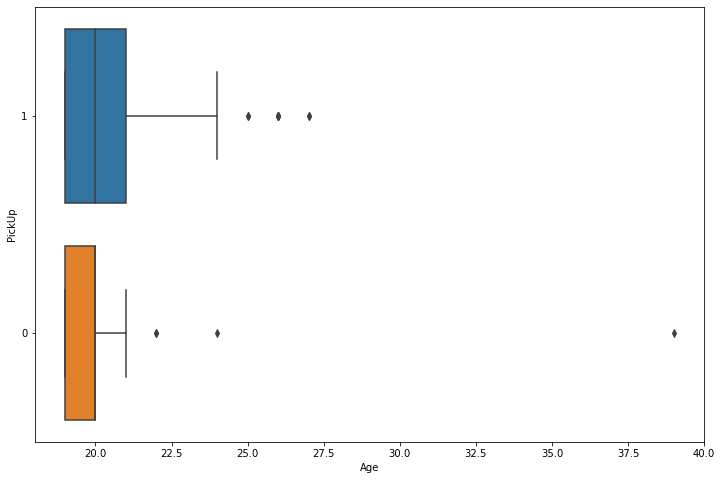

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot( y=df["PickUp"], x=df["Age"] );
plt.show()

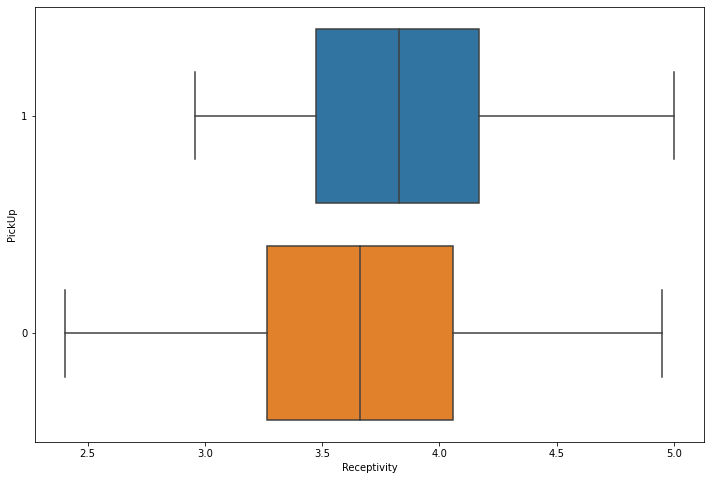

In [33]:
sns.boxplot( y=df["PickUp"], x=df["Receptivity"] );
plt.show()

We can draw Box Plot diagram for Receptivitiy and Age variables. There is no outliers for Recetivitity. On the other hand, there are 6 Outliers for Age variable. However that can be. Max value of Age is 39. That is normal. So there is no significant outliers. 

### Q5- How is your dependent variable distributed in each cell?

In [60]:
b = list(df["PickUp"])

In [63]:
shapiro_test_1 = stats.shapiro(b)
shapiro_test_1

ShapiroResult(statistic=0.6156522035598755, pvalue=1.222412598330336e-20)

Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 1.222 > 0.05 so distribution of dependent are normally distributed. 

### Q7- Is there homogeneity or heterogeneity of variance?

In [36]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm

In [37]:
#add constant to predictor variables
z = sm.add_constant(z)

#fit regression model
model = sm.OLS(y, z).fit()

In [38]:
#perform White's test
white_test = het_white(model.resid,  model.model.exog)

In [39]:
#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))

{'Test Statistic': 2.7933660690949513, 'Test Statistic p-value': 0.24741627561476567, 'F-Statistic': 1.3951736616783204, 'F-Test p-value': 0.25030360116472505}


After using White Test,the test statistic is X2 = 2.793. The corresponding p-value is 0.247. White’s test uses the following null and alternative hypotheses:

Null (H0): Homoscedasticity is present (residuals are equally scattered) Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered)
Since the p-value is not less than 0.05, we fail to reject the null hypothesis.

This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

Yes, residual data show homoscedasticity.

### Q6- Do you need to perform any transformations?

Distribution of dependent variable are normally distributed. We don`t need transformation.

### Q8- What is the mean score of receptivity in the experimental condition?

In [43]:
df.sample(5)

,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive,filter_$
63,64.0,0,1,3.69800,female,19.0,black or african,junior,Yes,Not Selected
88,89.0,0,1,3.55008,female,19.0,eastern or asian,sophomore,No,Selected
107,108.0,1,1,3.21726,female,19.0,"hispanic, latino, spanish",freshman,No,Selected
97,98.0,1,1,4.43760,female,19.0,white or european,junior,Yes,Not Selected
24,25.0,1,1,4.28968,female,21.0,black or african,junior,Yes,Not Selected


In [47]:
df_ex = df[(df.PickUp == 1)]

In [46]:
Mean_1 = np.mean(df_ex["Receptivity"])
Mean_1

3.8634339999999976

### Q9- What is the mean score of receptivity in the control condition?

In [48]:
df_cc =  df[(df.PickUp == 0)]

In [50]:
Mean_2 = np.mean(df_cc['Receptivity'])
Mean_2

3.654451621621624

### Q10- What is your answer to RQ1? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions.

In the given dataset, we have two types of people one who are Receptivity. and another who are Non-Receptivity. So, we can divide data into two groups and compare their characteristics. Here Receptivity variable is dependent variable. On other side, our independent variables can be PickUp, Scent, Gender, Age, Ethnicity, YearInSchool, Contraceptive. The question in particular our independent variable is PickUp.  
I examined there  independence of observations is. After using the Durbin-Watson statistic, the value should PickUp & Receptivity be around 2. Durbin Watson value is 1.863 here. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation to not be problematic in this regression model.
Yes, there is independence of observations if you are trying to predict Pickup with Receptivity.
We can draw Box Plot diagram for Receptivitiy and Age variables, while two of them numerical are. After drawing diagrams, there is no outliers for Recetivitity. On the other hand, there are 6 Outliers for Age variable. However that can be. Max value of Age is 39. That is normal. So there is no significant outliers.
Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 1.222 > 0.05 so distribution of dependent are normally distributed. So we don´t need to perform any transformation.
After using White Test,the test statistic is X2 = 2.793. The corresponding p-value is 0.247. White’s test uses the following null and alternative hypotheses:
Null (H0): Homoscedasticity is present (residuals are equally scattered) Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered) Since the p-value is not less than 0.05, we fail to reject the null hypothesis.
This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.
Yes, residual data show homoscedasticity.

### RQ2: Is there any evidence to suggest that the presence of androstadienone spray will lead to more relationship receptivity than no spray?

### Q11- What is your dependent variable?

Our dependent variable is Receptivity. 

### Q12- What is(are) your independent variable(s)?

The question in particular our independent variable is the presence androstadienone spray. 

### Q13- Is there independence of observations? 

In [51]:
df.head()

,ParticipantNumber,PickUp,Scent,Receptivity,Gender,Age,Ethnicity,YearInSchool,Contraceptive,filter_$
0,1.0,1,0,3.25424,female,21.0,white or european,sophomore,Yes,Not Selected
1,2.0,1,1,4.43760,female,19.0,white or european,junior,No,Selected
2,3.0,1,1,4.43760,female,21.0,white or european,freshman,No,Selected
3,4.0,1,1,3.91988,female,19.0,white or european,junior,Yes,Not Selected
4,5.0,0,0,3.99384,female,20.0,eastern or asian,sophomore,No,Selected


In [70]:
y_list = list(df['Receptivity']) 
y = np.asarray(y_list)
x_list = list(df['Scent'])
x = np.asarray(x_list)

In [71]:
# Using statsmodels.durbin_watson() method
model=ols('x ~ y',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.331
Date:                Fri, 10 Feb 2023   Prob (F-statistic):             0.0388
Time:                        19:42:04   Log-Likelihood:                -138.13
No. Observations:                 194   AIC:                             280.3
Df Residuals:                     192   BIC:                             286.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0069      0.257      0.027      0.9

In [72]:
durbin_watson(model.resid)

0.88854268768353

After using the Durbin-Watson statistic, the value should be around 2. Durbin Watson value is 0.888 here. Since this is not within the range of 1.5 and 2.5, we would consider autocorrelation to be problematic in this regression model.

No, there is no independence of observations if you are trying to predict Receptivity with Scent.

### Q14- Are there any significant outliers?

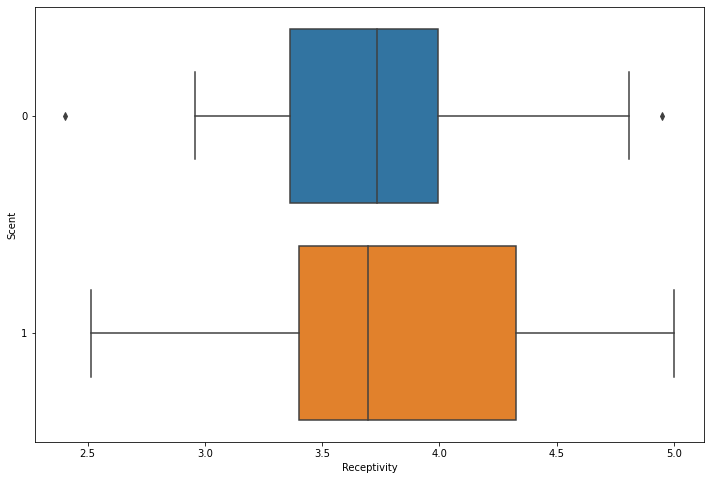

In [59]:
sns.boxplot( y=df["Scent"], x=df["Receptivity"] );
plt.show()

We can draw Box Plot diagram for Receptivitiy and Scent variables. There are 2 Outliers for variables. So yes there are significant outliers.

### Q15- How is your dependent variable distributed in each cell?

In [62]:
c = list(df['Receptivity'])

In [65]:
shapiro_test_2 = stats.shapiro(c)
shapiro_test_2

ShapiroResult(statistic=0.9844915270805359, pvalue=0.031009113416075706)

Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 0.031 < 0.05 so distribution of dependent are not normally distributed.

### Q16- Do you need to perform any transformations?

Distribution of dependent value are not normally distributed. So we need to perform any transformations.  

In [67]:
# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(c)

Lambda value used for Transformation: 0.34351158278149607


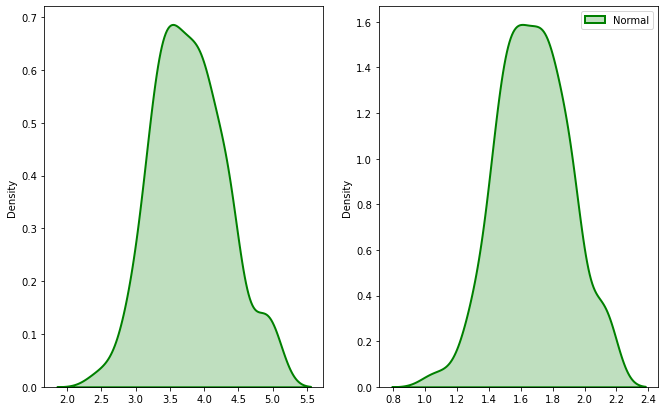

In [68]:
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(c, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(7)
fig.set_figwidth(11)
 
print(f"Lambda value used for Transformation: {fitted_lambda}")

In [69]:
shapiro_test_4 = stats.shapiro(fitted_data)
shapiro_test_4

ShapiroResult(statistic=0.9892571568489075, pvalue=0.1532202959060669)

After applying Box-Cox transformation method, p-value turn into higher value; 0.15 > 0.05. Distribution of dependent value are normally distributed.

### Q17- Is there homogeneity or heterogeneity of variance?

In [75]:
#add constant to predictor variables
x = sm.add_constant(x)

#fit regression model
model = sm.OLS(y, x).fit()

In [76]:
#perform White's test
white_test_2 = het_white(model.resid,  model.model.exog)

In [77]:
#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test_2)))

{'Test Statistic': 12.33012653624705, 'Test Statistic p-value': 0.00044570619386553504, 'F-Statistic': 13.031243154533147, 'F-Test p-value': 0.00039084644468384116}


After using White Test,the test statistic is X2 = 12.33. The corresponding p-value is 0.0004. White’s test uses the following null and alternative hypotheses:

Null (H0): Homoscedasticity is present (residuals are equally scattered) Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered) Since the p-value is less than 0.05, we reject the null hypothesis.

This means we have sufficient evidence to say that heteroscedasticity is present in the regression model.
Yes, residual data don't show homoscedasticity.

### Q18- What is the mean score of receptivity in the experimental condition?

In [79]:
df_ex_2 = df[(df.Scent == 1)]

In [83]:
mean_3 = np.mean(df_ex_2['Receptivity'])

In [84]:
mean_3

3.8568834615384597

### Q19- What is the mean score of receptivity in the control condition?

In [85]:
df_cc_2 = df[(df.Scent == 0)]

In [86]:
mean_3 = np.mean(df_cc_2['Receptivity'])

In [87]:
mean_3

3.6991735555555554

### Q20- What is your answer to RQ2? Report on the findings (no less than 150 words). Don’t forget to mention the assumptions.

In the given dataset, we have two types of people one who are Recepcivity and another who are Non-Receptivity. So, we can divide data into two groups and compare their characteristics. Here Receptivity variable is dependent variable. On other side, our independent variables can be Scent,Receptivity, Gender, Age, Ethnicity, YearInSchool, Contraceptive. The question in particular our independent variable is the presence androstadienone spray. 
I examined there independence of observations is. After using the Durbin-Watson statistic, the value between Receptivity & Scent should be around 2. Durbin Watson value is 0.888 here. Since this is not within the range of 1.5 and 2.5, we would consider autocorrelation to be problematic in this regression model. No, there is no independence of observations if you are trying to predict Receptivity. 
We can draw Box Plot diagram for Receptivitiy and Scent variables. There are 2 Outliers for variables. So yes there are significant outliers.
Data is normally distributed if the significance in these tests is p > 0.05. Data is normally distributed if the significance in these tests is p > 0.05. pvalue: 0.031 < 0.05 so distribution of dependent are not normally distributed.
After applying Box-Cox transformation method, p-value turn into higher value; 0.15 > 0.05. Distribution of dependent value are normally distributed.
After using White Test,the test statistic is X2 = 12.33. The corresponding p-value is 0.0004. White’s test uses the following null and alternative hypotheses:
Null (H0): Homoscedasticity is present (residuals are equally scattered) Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered) Since the p-value is less than 0.05, we reject the null hypothesis.
This means we have sufficient evidence to say that heteroscedasticity is present in the regression model. Yes, residual data don't show homoscedasticity.

### RQ3: Is there any evidence to suggest that the impact of the androstadienone spray on attractiveness effect will be enhanced by the pick-up approach?

### Q21- What is your dependent variable?

Our dependent variable is Receptivity.

### Q22- What is(are) your independent variable(s)?

Our independent variables are impact of the androstadienone spray and pick-up approach.

### Q23- Is there independence of observations? 

In [92]:
x_list = list(df["PickUp"])
x = np.asarray(x_list)

y_list = list(df['Receptivity']) 
y = np.asarray(z_list)

In [95]:
#Using statsmodels.durbin_watson() method
model=ols('x ~ y',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       0.037
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     7.324
Date:                Fri, 10 Feb 2023   Prob (F-statistic):            0.00742
Time:                        21:50:09   Log-Likelihood:                -131.56
No. Observations:                 194   AIC:                             267.1
Df Residuals:                     192   BIC:                             273.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0467      0.248     -0.188      0.8

In [96]:
durbin_watson(model.resid)

1.4278690737004749

After using the Durbin-Watson statistic, the value should be around 2. Durbin Watson value is 1.427 here. Since this is within the range of 1.5 and 2.5, we would consider autocorrelation to not be problematic in this regression model.

Yes, there is independence of observations if you are trying to predict.

### Q24- Are there any significant outliers?

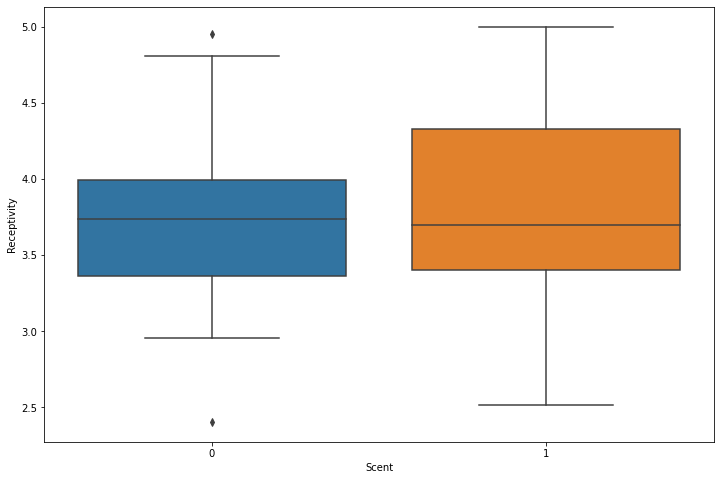

In [97]:
sns.boxplot( y=df["Receptivity"], x=df["Scent"] );
plt.show()

### Q25- How is your dependent variable distributed in each cell?

In [98]:
d = list(df['Receptivity'])

In [99]:
shapiro_test_4 = stats.shapiro(d)
shapiro_test_4

ShapiroResult(statistic=0.9844915270805359, pvalue=0.031009113416075706)

### Q26- Do you need to perform any transformations?

In [114]:
x1_list = list(df["PickUp"])
x1 = np.asarray(x1_list)
x2_list = list(df['Scent'])
x2 = np.asarray(x2_list)

In [122]:
x3 = np.add(x1,x2)/2 

In [123]:
x3

array([0.5, 1. , 1. , 1. , 0. , 0.5, 1. , 0. , 0.5, 0. , 0. , 0. , 0.5,
       0.5, 0.5, 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0.5, 1. , 1. , 0.5,
       0.5, 0.5, 0.5, 0.5, 0. , 0.5, 0.5, 0. , 0.5, 0. , 0.5, 0.5, 0.5,
       0.5, 0.5, 1. , 0. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 1. , 0.5,
       0. , 1. , 0.5, 1. , 0.5, 1. , 1. , 0. , 1. , 0.5, 0.5, 0.5, 1. ,
       0.5, 1. , 1. , 1. , 0.5, 1. , 1. , 1. , 0.5, 1. , 0.5, 1. , 0.5,
       1. , 0.5, 1. , 1. , 0.5, 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 1. , 1. , 0.5, 0.5, 1. , 1. , 1. , 1. , 0.5, 1. , 0.5, 1. ,
       0.5, 0.5, 1. , 1. , 1. , 0. , 0.5, 0.5, 0. , 0.5, 0.5, 0. , 0.5,
       0. , 0.5, 0.5, 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
       1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 1. ,
       1. , 1. , 1. , 1. , 1. , 1. , 1. , 0.5, 0.5, 0.5, 0.5, 0.

### Q27- Is there homogeneity or heterogeneity of variance?

In [124]:
#add constant to predictor variables
x3 = sm.add_constant(x3)

#fit regression model
model = sm.OLS(y, x3).fit()

In [125]:
#perform White's test
white_test_3 = het_white(model.resid,  model.model.exog)

In [127]:
#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test_3)))

{'Test Statistic': 5.70700211255225, 'Test Statistic p-value': 0.057642158749189217, 'F-Statistic': 2.8945245328481413, 'F-Test p-value': 0.05775612306814501}


After using White Test,the test statistic is X2 = 5.71. The corresponding p-value is 0.057. White’s test uses the following null and alternative hypotheses:

Null (H0): Homoscedasticity is present (residuals are equally scattered) Alternative (HA): Heteroscedasticity is present (residuals are not equally scattered) Since the p-value is not less than 0.05, we fail to reject the null hypothesis.
This means we do not have sufficient evidence to say that heteroscedasticity is present in the regression model.
Yes, residual data show homoscedasticity.

### Q28- Is there any interaction between the two factors?

### Q29- What is your answer to RQ3? Report on the findings (no less than 200 words). Don’t forget to mention the assumptions. You can use η2 instead of ω2.

### Q30- Answer the main research question by taking the above findings into account (no less than 200 words). Don’t forget to mention the assumptions.